In [ ]:
import sys
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def load_digits():
    img_digits=[]

    for i in range(10):
        filename='/content/digits/digit{}.bmp'.format(i) # digits0~9
        img_digits.append(cv2.imread(filename,cv2.IMREAD_GRAYSCALE))

        if img_digits[i] is None:
            return None

    return img_digits

In [ ]:
def find_digit(img,img_digits):
    max_idx = -1
    max_ccoeff = -1

    for i in range(10):
        img=cv2.resize(img,(100,120))
        res=cv2.matchTemplate(img,img_digits[i],cv2.TM_CCOEFF_NORMED)

        if res[0,0] > max_ccoeff:
            max_idx=i
            max_ccoeff=res[0,0]

    return max_idx

In [ ]:
def main():

    src=cv2.imread('/content/digits_print.bmp')

    if src is None:
        print('Image load fail')
        return

    img_digits=load_digits()

    if img_digits is None:
        print('img_digits load fail')
        return

    src_gray=cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
    # 입력 이미지 이진화
    _, src_bin = cv2.threshold(src_gray,0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    # 레이블링 : 태그작업
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(src_bin)
# 객체수 +1, 객체에 번호가 지정된 레이블 맵, (x,y,w,h,area(=픽셀 수)), 무게중심좌표

    # 결과 출력
    dst = src.copy()

    for i in range(1,cnt):
        (x,y,w,h,s)=stats[i]

        if s > 2000:
            digit=find_digit(src_gray[y:y+h, x:x+w], img_digits)
            cv2.rectangle(dst, (x, y), (x+w,y+h), (0, 255, 255))
            cv2.putText(dst,str(digit),(x,y-5), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2,cv2.LINE_AA)

    cv2_imshow(dst)

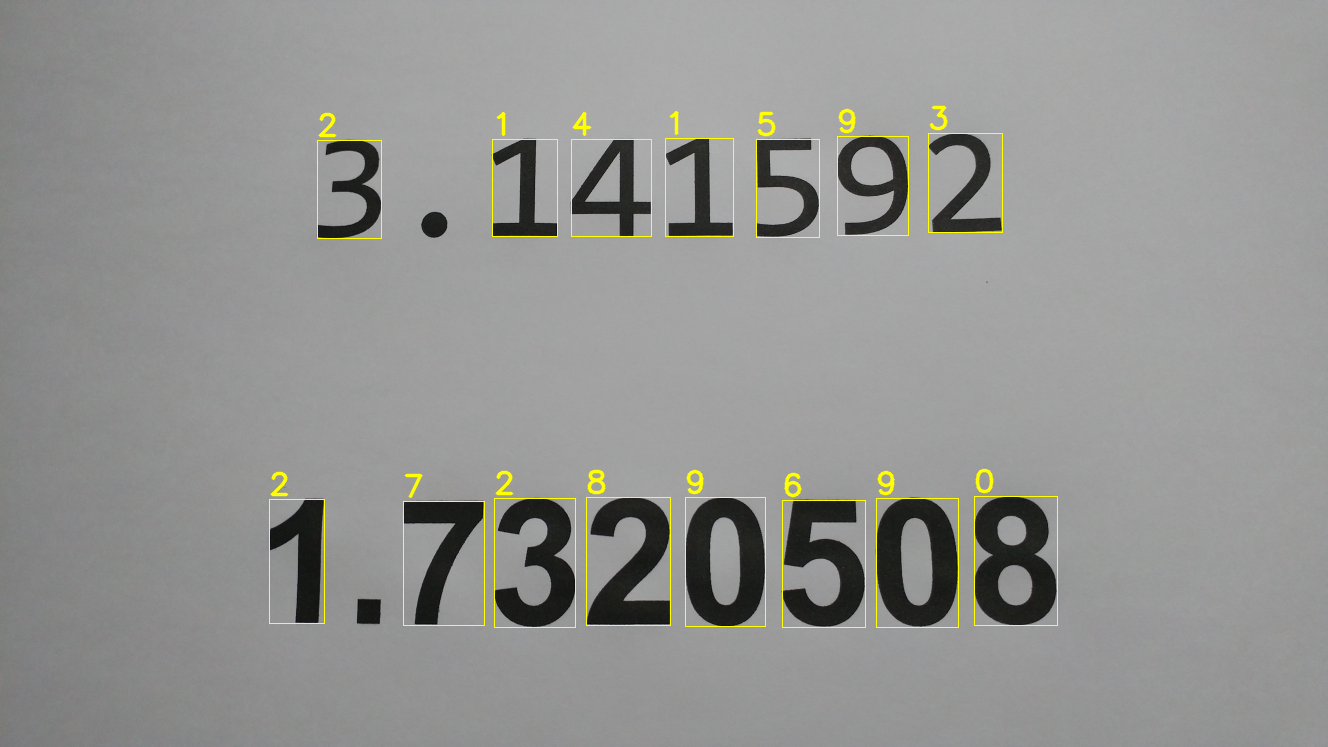

In [ ]:
main()